In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score, get_scorer_names, roc_curve, auc
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, make_scorer
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

Import de bibliotecas

In [3]:
df = pd.read_csv('train.csv')
df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


Dataframe com a tabela com a base de dados

Fonte: https://www.kaggle.com/datasets/lakshmi25npathi/santander-customer-transaction-prediction-dataset

Neste desafio, precisamos identificar quais clientes realizarão uma transação específica no futuro, independentemente do valor do dinheiro transacionado.

O dataset possui 200000 linhas, com aproximadamente 10% de clientes que realizaram a transação.

In [4]:
d = {0:1,
     1:-1}
df = pd.read_csv('train.csv')
df['target'] = df['target'].map(d)
df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,1,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,1,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,1,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,1,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,1,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,1,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,1,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,1,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


Remapeando a coluna target, que tem seus valores como:

    0: Não fez a transação específica

    1: Fez a transação específica
    
para os valores 1 (não fizeram), e -1 (fizeram)

In [64]:
y = df['target'].values
X = df.iloc[:, 2:202].values

Alocando os valores da coluna target ao array y, e das colunas restantes na matriz X

In [6]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, shuffle = True, random_state=123, stratify = y)

Separação da base em treino e teste. 80% dos dados serão utilizados para treino (160 mil), enquanto 20% (40 mil) dos dados serão utilizados na base de teste para avaliar a performance do modelo (dados não vistos na fase de treino).

In [66]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

Padronizando os dados. É feita a transformação para que os dados tenham média 0 e desvio padrão 1

In [8]:
search_space = {
    'n_estimators': Integer((50), (1500)),
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': Integer(2,100),
    'min_samples_leaf':Integer(1,100),
    'max_features':['sqrt', 'log2', None],
    'max_leaf_nodes':Integer(0,100),
    # 'min_impurity_decrease': Real(0,1),
    # 'ccp_alpha':Real(0,1),
    'bootstrap': [True, False],
    'warm_start': [True, False]
}

Variável com dicionário com chaves que representam os hiperparâmetros a serem testados, e seus valores como os intervalos ou listas com possibilidades de teste.

In [9]:
model = ExtraTreesClassifier(class_weight='balanced')

O modelo testado será utilizando a ferramenta ExtraTree, que é um algoritmo supervisionado (algoritmos supervisionados utilizam a variável alvo na fase de treinamento). Ela implementa um meta-estimador que ajusta um número de árvores de decisão aleatórias (ExtraTrees) em várias subamostras do dataset e utiliza a média para melhorar a precisão preditiva e o controle do overfit.

O modelo tem por padrão o hiperparametro de class_weight = 'balanced' pois os dados estão desbalanceados.

In [10]:
clf = BayesSearchCV(
    estimator=model,
    search_spaces=search_space,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    scoring='balanced_accuracy'
)
clf.fit(X_train,y=y_train)

BayesSearchCV(cv=5, estimator=ExtraTreesClassifier(class_weight='balanced'),
              n_iter=10, n_jobs=-1, scoring='balanced_accuracy',
              search_spaces={'bootstrap': [True, False],
                             'criterion': ['gini', 'entropy', 'log_loss'],
                             'max_features': ['sqrt', 'log2', None],
                             'max_leaf_nodes': Integer(low=0, high=100, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=100, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=1500, prior='uniform', transform='normalize'),
                             'warm_start': [True, False]})

Nessa fase, utilizamos o BaesyanSearch com validação cruzada. O Baesyan search tem como objetivo, a cada iteração, melhorar o score da medida de avaliação escolhida, e, para isso, ele utiliza de uma heurística para otimizar os hiperparametros.

In [11]:
print(clf.best_score_)
print(clf.best_params_)

0.7909316081890593
OrderedDict([('bootstrap', False), ('criterion', 'gini'), ('max_features', 'log2'), ('max_leaf_nodes', 54), ('min_samples_leaf', 28), ('min_samples_split', 44), ('n_estimators', 767), ('warm_start', False)])


Após 631 minutos (12h31), são retornados o melhor score obtido (melhor acurácia balanceada) e os respectivos hiperparâmetros que levaram a ela.

In [12]:
clf1 = clf.best_estimator_
y_test_pred = clf1.predict(X_test)

Dado que temos os hiperparâmetros, criamos um novo modelo com estes.

Uma variável y_test_pred receberá o retorno da função predict, que retornará as targets para a base de teste (a qual seus dados são desconhecidos para o modelo)

In [13]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
conf_matrix

array([[ 3066,   954],
       [ 6664, 29316]], dtype=int64)

É gerada a matriz de confusão, ilustrada abaixo

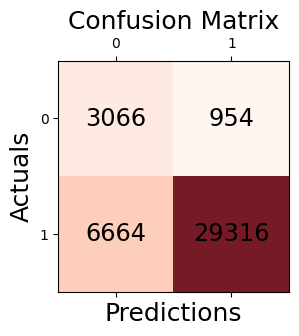

In [63]:
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.9)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

As linhas representam as classificações reais, e as colunas, as preditas.

    0,0 - Verdadeiros negativos: 3066 (clientes que realizaram a transação classificados corretamente)

    0,1 - Falsos positivos: 954 (clientes que realizaram classificados incorretamente)

    1,0 - Falsos negativos: 6664 (clientes que não realizaram classificados incorretamente)

    1,1 - Verdadeiros positivos: 29316 (clientes que não realizaram a transação classificados corretamente)

In [167]:
def avalia_indices(tn, fp, fn, tp):
    ac = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    sens = tp/(tp+fn)
    f1 = (2*precision*sens)/(precision+sens)
    esp = tn/(tn+fp)
    ef = (sens+esp)/2
    auc = roc_auc_score(y_test,y_test_pred)
    matt = matthews_corrcoef(y_test,y_test_pred)
    cohen = cohen_kappa_score(y_test,y_test_pred)
    print(f'Acurácia: {ac*100:.2f}%')
    print(f'Precisão: {precision*100:.2f}%')
    print(f'Recall: {sens*100:.2f}%')
    print(f'F1-Score: {f1*100:.2f}%')
    print(f'Especificidade: {esp*100:.2f}%')
    print(f'Eficiência: {ef*100:.2f}%')
    print(f'Área abaixo da curva ROC: {auc:.2f}')
    print(f'Coeficiente de Matthews: {matt:.2f}')
    print(f'Coeficiente de correlação de Kappa: {cohen:.2f}')

    scores = [ac, precision, sens, f1, esp, ef, auc, cohen, matt]
    labels = ['Acurácia', '  Precisão', 'Recall', 'F1\nScore','Especi-\nficidade', 'Eficiên\ncia','Área\nabaixo\n da curva ROC', 'Kappa', 'Matthew']
    plt.bar(labels, scores, width=.2)
    plt.title('Avaliação dos índices de avaliação')
    plt.xlabel('Medidas de Avaliação')
    plt.grid(True, which='both', linestyle='--', linewidth=0.8, color='red')

Criei uma função que vai calcular alguns scores que serão utilizados para avaliação do modelo. Lembrando que a classe positiva (1) representa clientes que não realizaram uma transação, enquanto a classe negativa (0), representa clientes que realizaram a transação.

Abaixo, uma lista explicando cada score:

    Acurácia: De maneira geral, indica a performance do modelo, ou seja, a taxa de acertos do modelo (OLIVA, 2019).

    Precisão: Dentre todas as classificações positivas, a porcentagem que foi classificada correta (OLIVA, 2019).

    Sensibilidade: A técnica consiste em avaliar a taxa de verdadeiros positivos em relação a todos os valores positivos esperados (OLIVA, 2019).

    F1-Score (F1): É calculada a partir de uma média harmônica entre a precisão e a revocação (OLIVA, 2019).

    Especificidade: Indica a quantidade de instancias negativas rotuladas corretamente em relação a todos valores negativos esperados (OLIVA, 2019).

    Eficiência: Valor médio entre o recall e a especificidade (OLIVA, 2019).

    Área abaixo da curva ROC: Avalia a habilidade do modelo de distinguir entre as classes verdadeiras e falsas em termos de probabilidade de classificação (quanto mais perto de 1, melhor o modelo classifica corretamente verdadeiros e falsos).

    Kappa e Matthews: Medidas que avaliam a concordância entre dois observadores ou dois instrumentos que classificam uma série de unidades observacionais. Quanto mais próximo de 1, melhor indicam que há concordancia na classificação.

Acurácia: 80.95%
Precisão: 96.85%
Recall: 81.48%
F1-Score: 88.50%
Especificidade: 76.27%
Eficiência: 78.87%
Área abaixo da curva ROC: 0.79
Coeficiente de Matthews: 0.40
Coeficiente de correlação de Kappa: 0.35


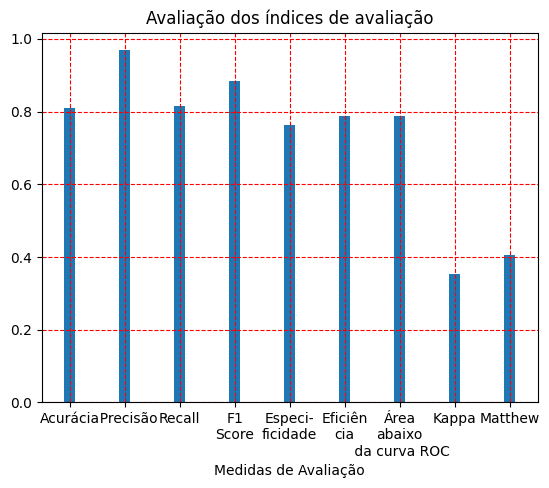

In [168]:
avalia_indices(tn, fp, fn, tp)

Dado o percentual de especificidade, nota-se que nos dados de teste houve que aproximadamente 76% de acerto de clientes que realizaram uma transação. Dado que o dataset é desbalanceado, pode-se considerar uma boa taxa de acerto da classe minoritária.